In [1]:
#install Seaborn package. Comment after running once.
!pip install seaborn
!pip install statsmodels
!pip install -q datascience                                       
!pip install -q pandas-profiling
print('Installed...')

Installed...


In [2]:
# Import Dependencies
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import math
import warnings
from sklearn.linear_model import LinearRegression  
from sklearn import metrics
import seaborn as sns                                             
%matplotlib inline
sns.set()
import datetime
from subprocess import check_output
import scipy as sp 
from scipy import stats
from scipy.stats import norm

In [3]:
# 2. Load data
beijing_train = pd.DataFrame(pd.read_csv('beijing_train.csv',index_col = 0))        # Air Quality data for training is loaded
beijing_test = pd.DataFrame(pd.read_csv('beijing_test.csv',index_col = 0 ) )   # Air Quality data for testing is loaded

In [4]:
# 3. Check the head of the train data (first few rows)
display(beijing_train.head())
# 3. Check the head of the test data (first few rows)
beijing_test.head()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
REF_NO,,,,,,,,,,,,,,,,,
1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
REF_NO,,,,,,,,,,,,,,,,
33649,2017,1,1,0,496.0,8.0,121.0,6100.0,4.0,-4.7,1022.1,-6.1,0.0,ENE,1.0,Aotizhongxin
33650,2017,1,1,1,497.0,7.0,113.0,6300.0,4.0,-5.2,1022.3,-6.4,0.0,E,0.7,Aotizhongxin
33651,2017,1,1,2,469.0,7.0,111.0,6200.0,4.0,-5.4,1022.5,-6.5,0.0,ENE,1.1,Aotizhongxin
33652,2017,1,1,3,425.0,6.0,109.0,5900.0,3.0,-5.2,1022.5,-6.2,0.0,E,1.1,Aotizhongxin
33653,2017,1,1,4,468.0,10.0,123.0,7700.0,16.0,-5.0,1021.9,-5.8,0.0,ENE,1.0,Aotizhongxin


In [5]:
# 4. Check for missing values
print(beijing_train.isnull().sum())
print(beijing_test.isnull().any())
print(beijing_train.shape)
print(beijing_test.shape)

year           0
month          0
day            0
hour           0
PM2.5       8475
PM10        6222
SO2         8776
NO2        11859
CO         20261
O3         13007
TEMP         264
PRES         265
DEWP         269
RAIN         261
wd          1389
WSPM         238
station        0
dtype: int64
year       False
month      False
day        False
hour       False
PM10       False
SO2        False
NO2        False
CO         False
O3         False
TEMP       False
PRES       False
DEWP       False
RAIN       False
wd         False
WSPM       False
station    False
dtype: bool
(403776, 17)
(16728, 16)


In [6]:
# 5. Summary Statistics
beijing_train.describe()

,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,403776.000000,403776.000000,403776.000000,403776.000000,395301.000000,397554.000000,395000.000000,391917.000000,383515.000000,390769.000000,403512.000000,403511.000000,403507.000000,403515.000000,403538.000000
mean,2014.564194,6.735378,15.748217,11.500000,79.248275,104.327897,15.733060,50.352785,1214.843339,58.119327,14.088899,1010.282534,3.157291,0.067052,1.718380
std,1.097503,3.356479,8.808891,6.922195,79.146708,90.136400,21.739455,34.771910,1124.285676,57.375966,11.303534,10.356778,13.617273,0.837845,1.237965
min,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,2014.000000,4.000000,8.000000,5.750000,21.000000,36.000000,2.000000,23.000000,500.000000,11.000000,4.000000,1002.000000,-8.000000,0.000000,0.900000
50%,2015.000000,7.000000,16.000000,11.500000,55.000000,83.000000,7.000000,43.000000,900.000000,45.000000,15.400000,1009.800000,4.200000,0.000000,1.400000
75%,2016.000000,10.000000,23.000000,17.250000,110.000000,145.000000,19.000000,71.000000,1500.000000,83.000000,23.500000,1018.300000,15.500000,0.000000,2.200000
max,2016.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [7]:
# 5. Summary Statistics
beijing_test.describe()

,year,month,day,hour,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,16728.0,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000,16728.000000
mean,2017.0,1.468795,15.230631,11.514168,110.716643,18.130918,57.198290,1584.660450,39.935198,0.346082,1021.839977,-13.451417,0.002469,2.003437
std,0.0,0.499040,8.583158,6.933537,123.370127,19.297973,41.855035,1740.982006,31.398917,4.706547,6.272443,6.377738,0.035825,1.406874
min,2017.0,1.000000,1.000000,0.000000,3.000000,1.000000,2.000000,100.000000,1.000000,-13.425000,997.100000,-31.700000,0.000000,0.000000
25%,2017.0,1.000000,8.000000,6.000000,24.000000,5.000000,21.000000,400.000000,9.000000,-2.800000,1018.000000,-18.700000,0.000000,1.100000
50%,2017.0,1.000000,15.000000,11.000000,68.000000,12.000000,51.000000,900.000000,38.000000,-0.200000,1022.000000,-13.000000,0.000000,1.600000
75%,2017.0,2.000000,23.000000,18.000000,153.000000,25.000000,84.000000,2100.000000,64.000000,2.900000,1026.250000,-8.100000,0.000000,2.600000
max,2017.0,2.000000,31.000000,23.000000,994.000000,300.000000,276.000000,10000.000000,500.000000,16.200000,1037.600000,0.900000,1.100000,12.000000


In [8]:
# 4. Check for info
beijing_train.info(verbose = True, memory_usage = 'deep', show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 403776 entries, 1 to 33648
Data columns (total 17 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   year     403776 non-null  int64  
 1   month    403776 non-null  int64  
 2   day      403776 non-null  int64  
 3   hour     403776 non-null  int64  
 4   PM2.5    395301 non-null  float64
 5   PM10     397554 non-null  float64
 6   SO2      395000 non-null  float64
 7   NO2      391917 non-null  float64
 8   CO       383515 non-null  float64
 9   O3       390769 non-null  float64
 10  TEMP     403512 non-null  float64
 11  PRES     403511 non-null  float64
 12  DEWP     403507 non-null  float64
 13  RAIN     403515 non-null  float64
 14  wd       402387 non-null  object 
 15  WSPM     403538 non-null  float64
 16  station  403776 non-null  object 
dtypes: float64(11), int64(4), object(2)
memory usage: 97.3 MB


In [9]:
beijing_test.info(verbose = True, memory_usage = 'deep', show_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16728 entries, 33649 to 35064
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   year     16728 non-null  int64  
 1   month    16728 non-null  int64  
 2   day      16728 non-null  int64  
 3   hour     16728 non-null  int64  
 4   PM10     16728 non-null  float64
 5   SO2      16728 non-null  float64
 6   NO2      16728 non-null  float64
 7   CO       16728 non-null  float64
 8   O3       16728 non-null  float64
 9   TEMP     16728 non-null  float64
 10  PRES     16728 non-null  float64
 11  DEWP     16728 non-null  float64
 12  RAIN     16728 non-null  float64
 13  wd       16728 non-null  object 
 14  WSPM     16728 non-null  float64
 15  station  16728 non-null  object 
dtypes: float64(10), int64(4), object(2)
memory usage: 3.9 MB


In [10]:
#6. to understand skew in all variables and see if y variable has a normal distribution
#Which feature in the dataset is normally distributed?
print(beijing_train.skew())
print(beijing_test.skew())

year     -0.066413
month    -0.053269
day       0.005683
hour      0.000000
PM2.5     1.974287
PM10      1.816482
SO2       3.007737
NO2       1.052701
CO        2.560662
O3        1.635164
TEMP     -0.168698
PRES      0.151948
DEWP     -0.250022
RAIN     29.440245
WSPM      1.625270
dtype: float64
year      0.000000
month     0.125076
day       0.042312
hour      0.001134
PM10      2.253404
SO2       3.169759
NO2       0.845052
CO        1.955740
O3        0.852595
TEMP      0.566485
PRES     -0.419652
DEWP     -0.138297
RAIN     17.861775
WSPM      1.549774
dtype: float64


In [11]:
#7. understand dash, question mark or unique values etc Univariate/Features
beijing_train['station'].unique() #to check dash, question mark etc

array(['Aotizhongxin', 'Changping', 'Dingling', 'Dongsi', 'Guanyuan',
       'Gucheng', 'Huairou', 'Nongzhanguan', 'Shunyi', 'Tiantan',
       'Wanliu', 'Wanshouxigong'], dtype=object)

In [12]:
#7. understand dash, question mark or unique values etc Univariate/Features
beijing_train['wd'].unique() #to check dash, question mark etc

array(['NNW', 'N', 'NW', 'NNE', 'ENE', 'E', 'NE', 'W', 'SSW', 'WSW', 'SE',
       'WNW', 'SSE', 'ESE', 'S', 'SW', nan], dtype=object)

In [13]:
#8. understand Univariate/Features
beijing_train['PM2.5'].value_counts()

3.0      8354
10.0     6609
11.0     6418
9.0      6374
12.0     6346
         ... 
67.5        1
683.0       1
139.7       1
105.4       1
652.0       1
Name: PM2.5, Length: 866, dtype: int64

<AxesSubplot:>

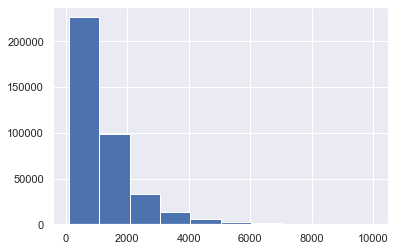

In [14]:
#9. Visualize Univariate
beijing_train['CO'].hist()

<AxesSubplot:>

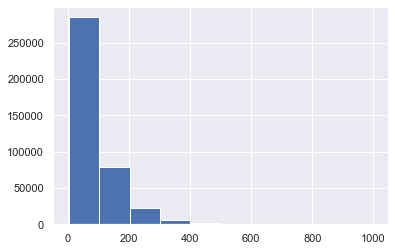

In [15]:
#10. LR Assumption, TV normally distributed 
beijing_train['PM2.5'].hist()

<AxesSubplot:>

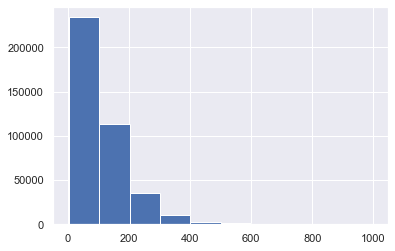

In [16]:
#11. if not log transform and check
beijing_train['PM10'].hist()

In [17]:
#Time series
#merging all time related variables to one feature
beijing_train['datetime'] = pd.to_datetime(beijing_train[['year', 'month','day', 'hour']])
# dropping off all time related variables 
beijing_train = beijing_train.drop(['year', 'month','day', 'hour'], axis = 1)

beijing_train.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,datetime
REF_NO,,,,,,,,,,,,,,
1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin,2013-03-01 00:00:00
2,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin,2013-03-01 01:00:00
3,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin,2013-03-01 02:00:00
4,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin,2013-03-01 03:00:00
5,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin,2013-03-01 04:00:00


In [18]:
#set index for time related columns
beijing_train.set_index(['datetime'],inplace=True,drop=False)
print(beijing_train.head())

                     PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  \
datetime                                                                        
2013-03-01 00:00:00    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0 -18.8   
2013-03-01 01:00:00    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2 -18.2   
2013-03-01 02:00:00    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5 -18.2   
2013-03-01 03:00:00    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5 -19.4   
2013-03-01 04:00:00    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2 -19.5   

                     RAIN   wd  WSPM       station            datetime  
datetime                                                                
2013-03-01 00:00:00   0.0  NNW   4.4  Aotizhongxin 2013-03-01 00:00:00  
2013-03-01 01:00:00   0.0    N   4.7  Aotizhongxin 2013-03-01 01:00:00  
2013-03-01 02:00:00   0.0  NNW   5.6  Aotizhongxin 2013-03-01 02:00:00  
2013-03-01 03:00:00   0.0   NW   3.1  Aotizhongxin 2013-03-01 03:00

In [19]:
#Which year had the highest Pollution level?
#yearly mean?
#idMax?
#print(beijing_train.idmax())
df = beijing_train.groupby(beijing_train.index.year).mean()
print (df)

              PM2.5        PM10        SO2        NO2           CO         O3  \
datetime                                                                        
2013      80.040536  102.823208  20.048420  52.534040  1203.131299  57.326222   
2014      85.575700  116.126691  20.878454  54.781129  1256.904078  58.307991   
2015      79.626788  103.613500  13.014975  48.191862  1257.823438  59.240321   
2016      71.930151   94.615609   9.799084  46.395580  1138.790118  57.455946   

               TEMP         PRES      DEWP      RAIN      WSPM  
datetime                                                        
2013      15.689921  1007.734361  5.473352  0.066097  1.599140  
2014      13.915825  1010.641445  2.742025  0.049795  1.637813  
2015      13.434066  1011.116694  2.628885  0.076122  1.772166  
2016      13.574623  1011.225106  2.160557  0.076037  1.844927  


**Observations**
- looks like 2014 is the highest polluted year

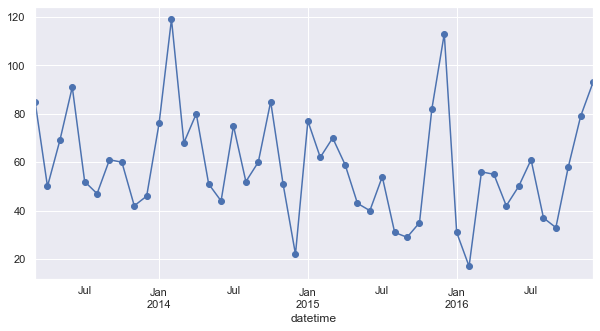

In [20]:
#Which month had the highest Pollution level?
#df1 = beijing_train.groupby(beijing_train.index.month).mean()
#print (df1)
monthly_max = beijing_train['PM2.5'].resample("M").median() #this gives me in every year- month wise max
monthly_max.plot(style="-o", figsize=(10, 5));


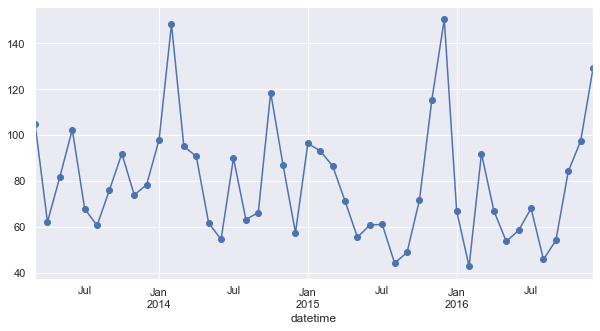

In [21]:
monthly_max1 = beijing_train['PM2.5'].resample("M").mean()
monthly_max1.plot(style="-o", figsize=(10, 5));

<AxesSubplot:ylabel='Frequency'>

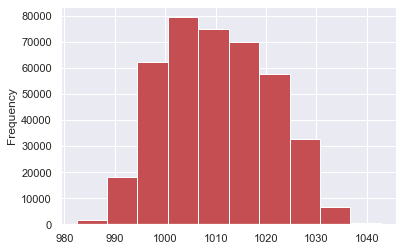

In [22]:
#Which feature in the dataset is normally distributed?
beijing_train['PRES'].plot(kind='hist', color='r')

station
Dongsi           85.465989
Nongzhanguan     84.129369
Wanshouxigong    84.086340
Gucheng          83.110626
Wanliu           82.920469
Guanyuan         82.515756
Aotizhongxin     82.260952
Tiantan          81.479200
Shunyi           78.802831
Changping        70.716012
Huairou          69.427838
Dingling         65.887825
Name: PM2.5, dtype: float64


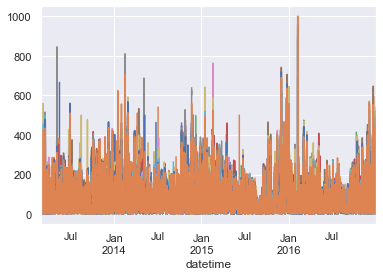

In [23]:
#Which station had the lowest pollution level?
max_pollution_station=beijing_train['PM2.5'].groupby(beijing_train['station']).mean().sort_values(ascending=False)
print(max_pollution_station)

beijing_train['PM2.5'].groupby(beijing_train['station']).plot();
#PM2.5 = air_quality.pivot(index="datetime", columns="location", values="value")

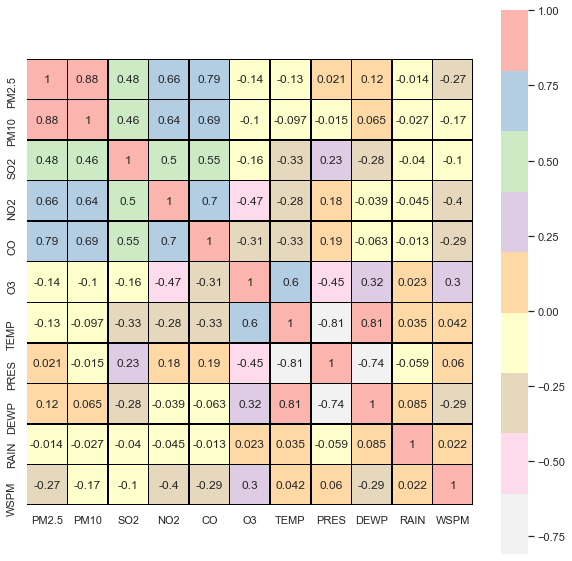

In [24]:
# 12. Check for Multicollinearity
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(beijing_train.corr(), annot=True,cmap='Pastel1_r',linewidths=0.5, linecolor='black',square=True, ax=ax );



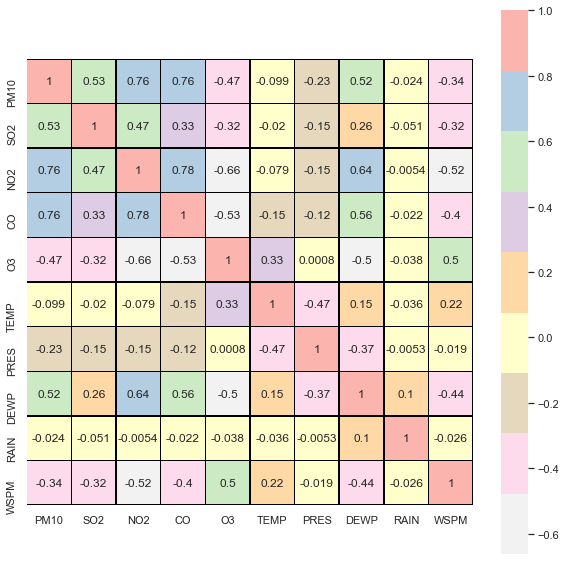

In [25]:
#Time series
#merging all time related variables to one feature
beijing_test['datetime'] = pd.to_datetime(beijing_test[['year', 'month','day', 'hour']])
# dropping off all time related variables 
beijing_test = beijing_test.drop(['year', 'month','day', 'hour'], axis = 1)
#set index for time related columns
beijing_test.set_index('datetime', inplace=False,drop=False)
beijing_test.head()

# 12. Check for Multicollinearity
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(beijing_test.corr(), annot=True,cmap='Pastel1_r',linewidths=0.5, linecolor='black',square=True, ax=ax );




C:\Users\vbhak\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


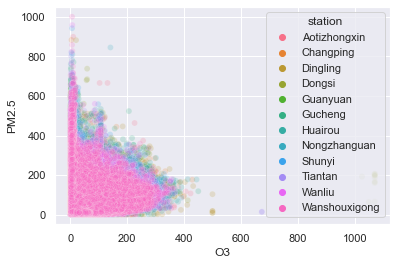

In [26]:
#Is there any relation between Ozone and PM2.5?
import seaborn as sns; sns.set_theme(color_codes=True)
ax = sns.scatterplot(data=beijing_train, x="O3", y="PM2.5",hue='station',alpha=0.2)


In [27]:
#checking shape
print(beijing_train.shape)
print(beijing_test.shape)

(403776, 14)
(16728, 13)


In [28]:
#DRop 
beijing_train = beijing_train.drop([ 'PRES', 'WSPM','RAIN','datetime'], axis = 1)
beijing_train

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,DEWP,wd,station
datetime,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,-18.8,NNW,Aotizhongxin
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,-18.2,N,Aotizhongxin
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,-18.2,NNW,Aotizhongxin
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,-19.4,NW,Aotizhongxin
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,-19.5,N,Aotizhongxin
...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,449.0,487.0,10.0,153.0,4500.0,4.0,-1.9,-6.1,ESE,Wanshouxigong
2016-12-31 20:00:00,460.0,492.0,12.0,146.0,4100.0,4.0,-2.5,-5.5,ENE,Wanshouxigong
2016-12-31 21:00:00,463.0,498.0,12.0,141.0,4400.0,5.0,-3.0,-5.3,E,Wanshouxigong


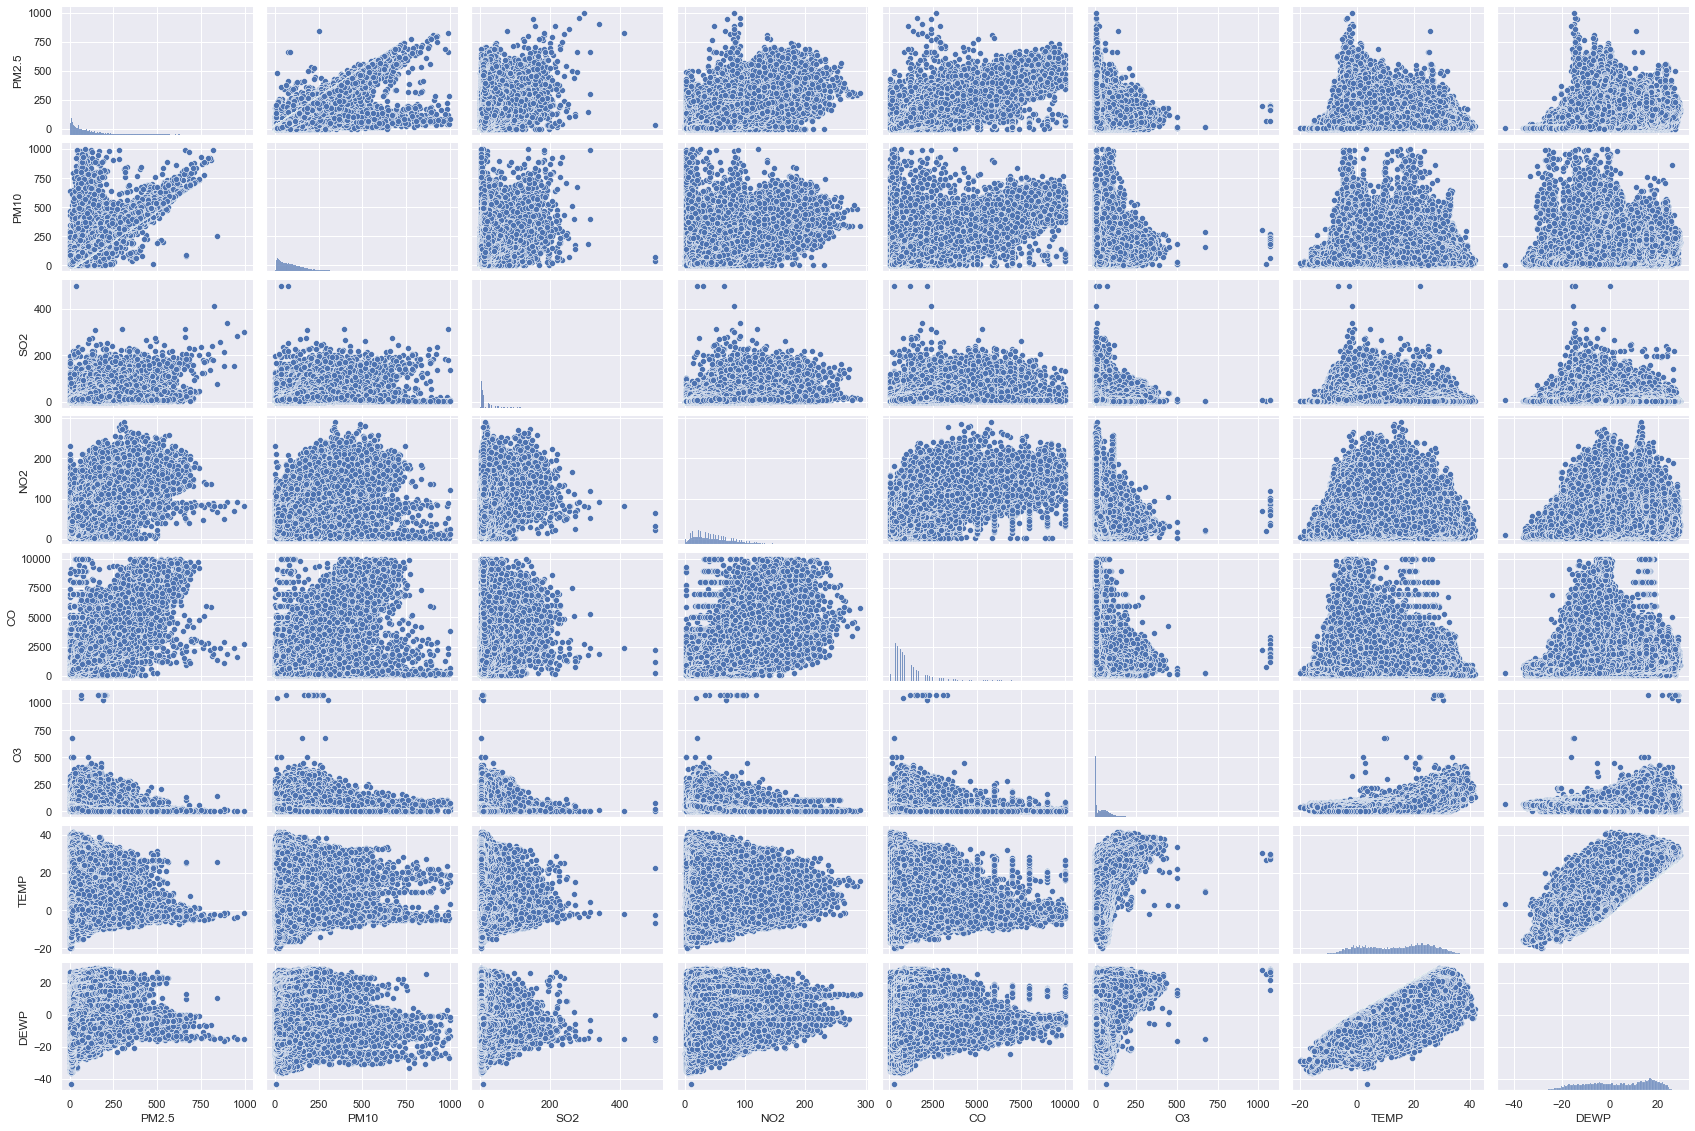

In [29]:
#13. Check for Linearity
sns.pairplot(data=beijing_train,height=2,aspect=1.5)

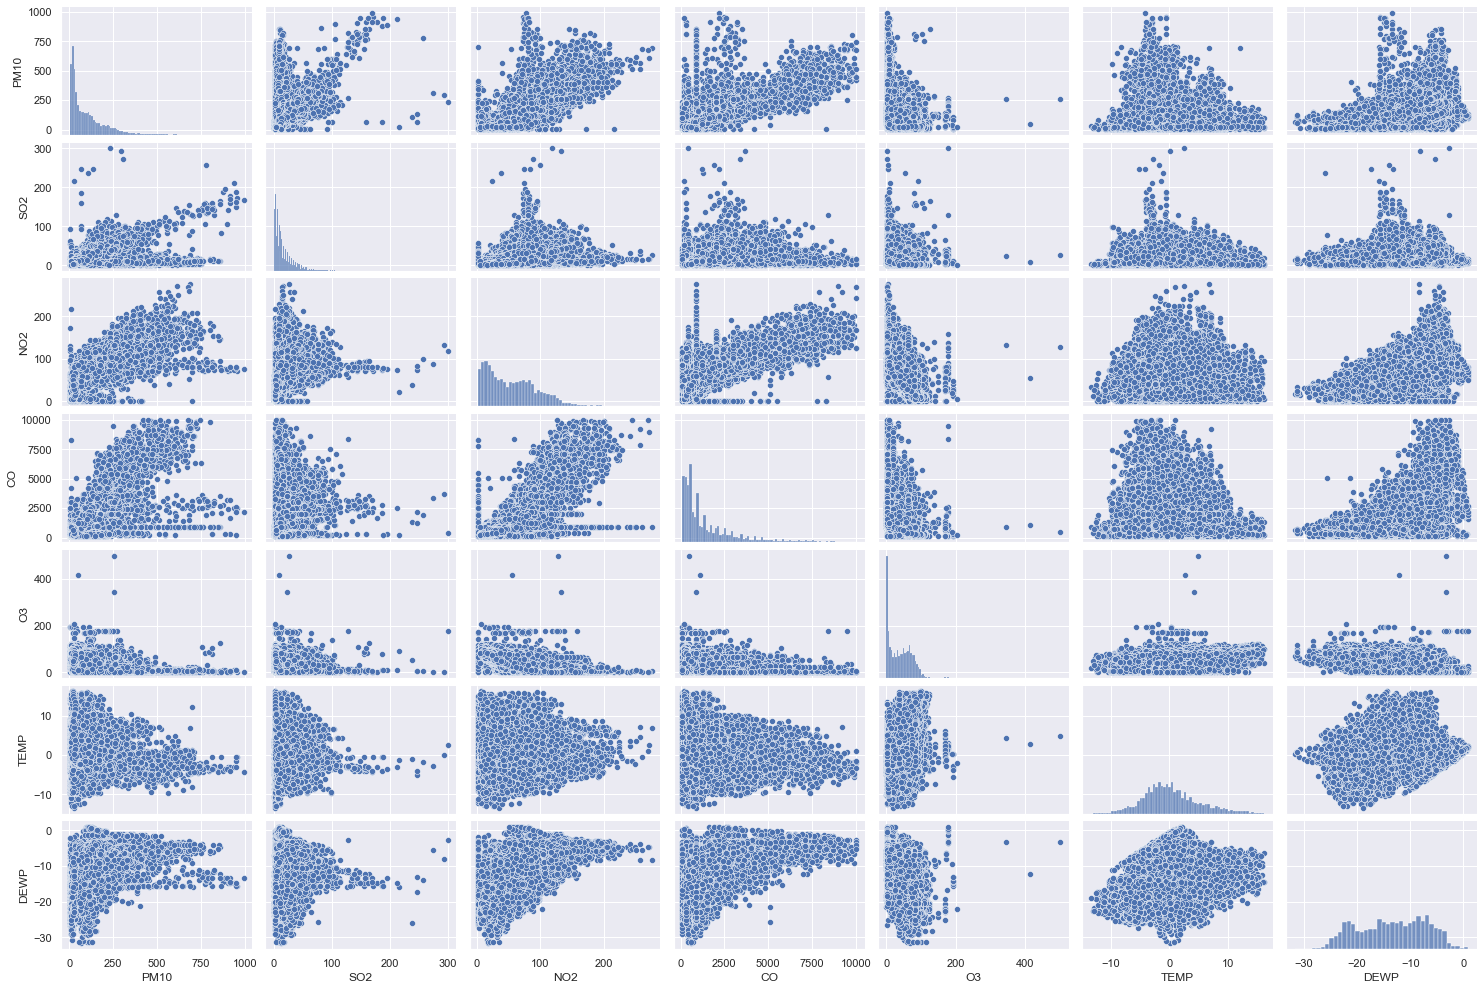

In [30]:
#13. Check for Linearity after drop
beijing_test = beijing_test.drop(['PRES', 'WSPM','RAIN','datetime'], axis = 1)
sns.pairplot(data=beijing_test,height=2,aspect=1.5)

In [31]:
#14. Feature Engineering
#transformations , additions, multiplications, inverse relations etc
beijing_train['dioxides']=beijing_train['SO2']+beijing_train['NO2']
beijing_test['dioxides']=beijing_test['SO2']+beijing_test['NO2']
beijing_train

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,DEWP,wd,station,dioxides
datetime,,,,,,,,,,,
2013-03-01 00:00:00,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,-18.8,NNW,Aotizhongxin,11.0
2013-03-01 01:00:00,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,-18.2,N,Aotizhongxin,11.0
2013-03-01 02:00:00,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,-18.2,NNW,Aotizhongxin,15.0
2013-03-01 03:00:00,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,-19.4,NW,Aotizhongxin,22.0
2013-03-01 04:00:00,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,-19.5,N,Aotizhongxin,24.0
...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00,449.0,487.0,10.0,153.0,4500.0,4.0,-1.9,-6.1,ESE,Wanshouxigong,163.0
2016-12-31 20:00:00,460.0,492.0,12.0,146.0,4100.0,4.0,-2.5,-5.5,ENE,Wanshouxigong,158.0
2016-12-31 21:00:00,463.0,498.0,12.0,141.0,4400.0,5.0,-3.0,-5.3,E,Wanshouxigong,153.0


In [32]:
#filling in NaN values

beijing_train=(beijing_train.groupby('station').apply(lambda x: x.fillna(x.median())))

beijing_train=beijing_train.apply(lambda x: x.fillna(x.value_counts().index[0]))

beijing_train

PM2.5   PM10   SO2    NO2      CO    O3  \
station       datetime                                                       
Aotizhongxin  2013-03-01 00:00:00    4.0    4.0   4.0    7.0   300.0  77.0   
              2013-03-01 01:00:00    8.0    8.0   4.0    7.0   300.0  77.0   
              2013-03-01 02:00:00    7.0    7.0   5.0   10.0   300.0  73.0   
              2013-03-01 03:00:00    6.0    6.0  11.0   11.0   300.0  72.0   
              2013-03-01 04:00:00    3.0    3.0  12.0   12.0   300.0  72.0   
...                                  ...    ...   ...    ...     ...   ...   
Wanshouxigong 2016-12-31 19:00:00  449.0  487.0  10.0  153.0  4500.0   4.0   
              2016-12-31 20:00:00  460.0  492.0  12.0  146.0  4100.0   4.0   
              2016-12-31 21:00:00  463.0  498.0  12.0  141.0  4400.0   5.0   
              2016-12-31 22:00:00  493.0  537.0  12.0  124.0  5000.0   8.0   
              2016-12-31 23:00:00  464.0  490.0   8.0  111.0  5400.0   7.0   

                                   TEMP  DEWP   wd        station  dioxides  
station       datetime                                                       
Aotizhongxin  2013-03-01 00:00:00  -0.7 -18.8  NNW   Aotizhongxin      11.0  
              2013-03-01 01:00:00  -1.1 -18.2    N   Aotizhongxin      11.0  
              2013-03-01 02:00:00  -1.1 -18.2  NNW   Aotizhongxin      15.0  
              2013-03-01 03:00:00  -1.4 -19.4   NW   Aotizhongxin      22.0  
              2013-03-01 04:00:00  -2.0 -19.5    N   Aotizhongxin      24.0  
...                                 ...   ...  ...            ...       ...  
Wanshouxigong 2016-12-31 19:00:00  -1.9  -6.1  ESE  Wanshouxigong     163.0  
              2016-12-31 20:00:00  -2.5  -5.5  ENE  Wanshouxigong     158.0  
              2016-12-31 21:00:00  -3.0  -5.3    E  Wanshouxigong     153.0  
              2016-12-31 22:00:00  -3.0  -5.0   SW  Wanshouxigong     136.0  
              2016-12-31 23:00:00  -4.0  -5.7  ENE  Wanshouxigong     119.0  

[403776 rows x 11 columns]

In [33]:
#checking after filling NaN
print(" \nCount total NaN at each column in a DataFrame : \n\n",
beijing_train.isnull().sum())

 
Count total NaN at each column in a DataFrame : 

 PM2.5       0
PM10        0
SO2         0
NO2         0
CO          0
O3          0
TEMP        0
DEWP        0
wd          0
station     0
dioxides    0
dtype: int64


In [34]:
#6. to understand skew in all variables and see if y variable has a normal distribution
#Which feature in the dataset is normally distributed?
print(beijing_train.skew())
print(beijing_test.skew())

PM2.5       2.007754
PM10        1.838839
SO2         3.048605
NO2         1.077532
CO          2.652119
O3          1.679472
TEMP       -0.168961
DEWP       -0.250203
dioxides    1.462597
dtype: float64
PM10        2.253404
SO2         3.169759
NO2         0.845052
CO          1.955740
O3          0.852595
TEMP        0.566485
DEWP       -0.138297
dioxides    0.721694
dtype: float64


In [35]:
#OHE of categorical cols
#beijing_train=pd.get_dummies(beijing_train['wd','station'], drop_first=True)
#beijing_test=pd.get_dummies(beijing_test['wd','station'], drop_first=True)
#beijing_train.head()

In [36]:
#ReSet Index, REF_NO
beijing_train.reset_index(inplace=True,drop=True)

beijing_train.head()

,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,DEWP,wd,station,dioxides
0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,-18.8,NNW,Aotizhongxin,11.0
1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,-18.2,N,Aotizhongxin,11.0
2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,-18.2,NNW,Aotizhongxin,15.0
3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,-19.4,NW,Aotizhongxin,22.0
4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,-19.5,N,Aotizhongxin,24.0


C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


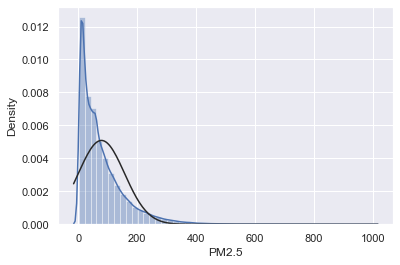

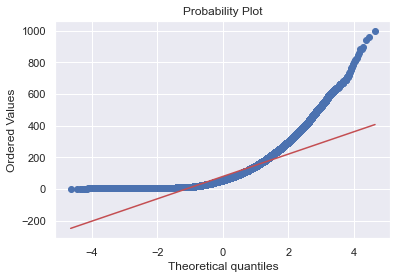

In [37]:

sns.distplot(beijing_train['PM2.5'],fit=norm);
fig = plt.figure()
res = stats.probplot(beijing_train['PM2.5'], plot=plt)

C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


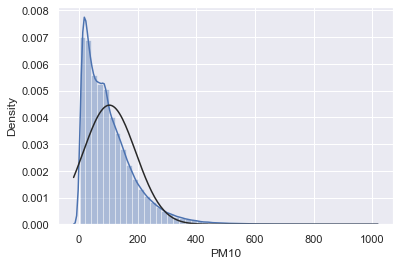

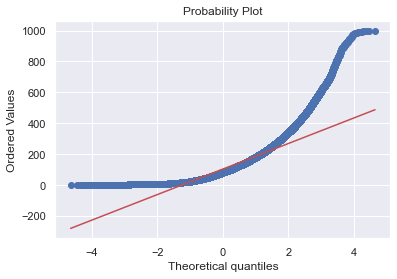

In [38]:
sns.distplot(beijing_train['PM10'],fit=norm);
fig = plt.figure()
res = stats.probplot(beijing_train['PM10'], plot=plt)

In [39]:
#15. label encoding 
#pd.get_dummies(df, columns=['col1','col2'], drop_first=True)

In [40]:
#print(beijing_train.skew())
#display(beijing_test.skew())

In [41]:
#ReSet Index, REF_NO
beijing_test.reset_index()
beijing_test.head()

,PM10,SO2,NO2,CO,O3,TEMP,DEWP,wd,station,dioxides
REF_NO,,,,,,,,,,
33649,496.0,8.0,121.0,6100.0,4.0,-4.7,-6.1,ENE,Aotizhongxin,129.0
33650,497.0,7.0,113.0,6300.0,4.0,-5.2,-6.4,E,Aotizhongxin,120.0
33651,469.0,7.0,111.0,6200.0,4.0,-5.4,-6.5,ENE,Aotizhongxin,118.0
33652,425.0,6.0,109.0,5900.0,3.0,-5.2,-6.2,E,Aotizhongxin,115.0
33653,468.0,10.0,123.0,7700.0,16.0,-5.0,-5.8,ENE,Aotizhongxin,133.0


In [42]:
#16.Prepare x, y variables
#X=beijing_train.loc[:,beijing_train.columns!='PM2.5']
features = ['PM10', 'CO','dioxides','TEMP','O3','DEWP']  

X=beijing_train[features]
print(X.head())
y=beijing_train['PM2.5']
#or # Create a model to test using the following features
#features_to_use = ['cola', 'colb']
#test_df = df[features_to_use]
#or feat_cols,x = df.drop(['cola'], axis=1)
X_test=beijing_test[features]
print(X_test.head())
print(y.tail())

   PM10     CO  dioxides  TEMP    O3  DEWP
0   4.0  300.0      11.0  -0.7  77.0 -18.8
1   8.0  300.0      11.0  -1.1  77.0 -18.2
2   7.0  300.0      15.0  -1.1  73.0 -18.2
3   6.0  300.0      22.0  -1.4  72.0 -19.4
4   3.0  300.0      24.0  -2.0  72.0 -19.5
         PM10      CO  dioxides  TEMP    O3  DEWP
REF_NO                                           
33649   496.0  6100.0     129.0  -4.7   4.0  -6.1
33650   497.0  6300.0     120.0  -5.2   4.0  -6.4
33651   469.0  6200.0     118.0  -5.4   4.0  -6.5
33652   425.0  5900.0     115.0  -5.2   3.0  -6.2
33653   468.0  7700.0     133.0  -5.0  16.0  -5.8
403771    449.0
403772    460.0
403773    463.0
403774    493.0
403775    464.0
Name: PM2.5, dtype: float64


In [43]:

#16. Train, test split
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val=train_test_split(X,y, test_size=0.2,random_state=1 )
### Getting train & test datasets for model evaluations: One-Hot-Encoding & dropping categorical features.
#X_train = pd.get_dummies(X_train)
#X_val = pd.get_dummies(X_val)
#X_test = pd.get_dummies(X_test)

In [44]:
#17. Scaling x variables
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform((X_train))
X_val=scaler.transform((X_val))
X_test=scaler.transform((X_test))

#Standard Scaler

#def normalize_feature(feature):
#"""
#input a feature column name in as df['feature']
#returns series of normalized feature values
# """
    #return (feature - feature.mean()) / feature.std()    

In [45]:
#18. LR
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [46]:
# this gives the coefficients of the 10 features selected above. 
def lr():
    features.insert(0,'Intercept')
    coef = regressor.coef_.tolist()
    coef.insert(0, regressor.intercept_)
    eq1 = zip(features, coef)
    for c1,c2 in eq1:
        print(c1,c2)
lr()
#print(regressor.intercept_)
#print(regressor.coef_)

Intercept 78.75859389511484
PM10 48.60375641636448
CO 20.910878519975366
dioxides 5.41635586268597
TEMP -15.657476534225207
O3 5.799920062201897
DEWP 18.836737783281738


In [47]:
#19. predicting y
train_pred = regressor.predict(X_train)
train_pred_df= pd.DataFrame(train_pred)
def lr():  
    train_pred_df.columns = ['PM2.5']
    head =train_pred_df.head()
    return head
lr()


,PM2.5
0,66.865327
1,83.805125
2,25.250266
3,41.630953
4,55.467124


In [48]:
val_pred = regressor.predict(X_val)
val_pred_df=pd.DataFrame(val_pred)
def lr():  
    val_pred_df.columns = ['PM2.5']
    head = val_pred_df.head()
    return head
lr()


,PM2.5
0,30.179598
1,258.223577
2,2.078967
3,3.175939
4,82.455311


In [49]:
test_pred = regressor.predict(X_test)
test_pred_df=pd.DataFrame(test_pred)
def lr():  
    test_pred_df.columns = ['PM2.5']
    head =  test_pred_df.head()
    return head
lr()


,PM2.5
0,399.971799
1,403.596669
2,386.393623
3,356.473181
4,417.727920


In [50]:
beijing_test=beijing_test.drop(['SO2', 'NO2','wd', 'station'], axis=1)
print(beijing_test.head())
#beijing_future_pred=beijing_test + test_pred_df
beijing_future_pred=pd.concat([beijing_test,test_pred_df.set_index(beijing_test.index)], axis=1)
beijing_future_pred

         PM10      CO    O3  TEMP  DEWP  dioxides
REF_NO                                           
33649   496.0  6100.0   4.0  -4.7  -6.1     129.0
33650   497.0  6300.0   4.0  -5.2  -6.4     120.0
33651   469.0  6200.0   4.0  -5.4  -6.5     118.0
33652   425.0  5900.0   3.0  -5.2  -6.2     115.0
33653   468.0  7700.0  16.0  -5.0  -5.8     133.0


,PM10,CO,O3,TEMP,DEWP,dioxides,PM2.5
REF_NO,,,,,,,
33649,496.0,6100.0,4.0,-4.7,-6.1,129.0,399.971799
33650,497.0,6300.0,4.0,-5.2,-6.4,120.0,403.596669
33651,469.0,6200.0,4.0,-5.4,-6.5,118.0,386.393623
33652,425.0,5900.0,3.0,-5.2,-6.2,115.0,356.473181
33653,468.0,7700.0,16.0,-5.0,-5.8,133.0,417.727920
...,...,...,...,...,...,...,...
35060,32.0,400.0,72.0,12.5,-16.2,27.0,-2.906739
35061,32.0,500.0,50.0,11.6,-15.1,44.0,1.408376
35062,28.0,500.0,54.0,10.8,-13.3,42.0,3.019805


In [51]:
beijing_future_pred.drop(['PM10', 'CO','O3', 'TEMP','DEWP','dioxides'], axis=1, inplace=True)
beijing_future_pred

,PM2.5
REF_NO,
33649,399.971799
33650,403.596669
33651,386.393623
33652,356.473181
33653,417.727920
...,...
35060,-2.906739
35061,1.408376
35062,3.019805


In [52]:
beijing_future_pred.to_csv("submission.csv",index=True, header=False)

In [53]:
#20. RMSE
from sklearn import metrics
MSE_train = metrics.mean_squared_error(y_train, train_pred)
MSE_val = metrics.mean_squared_error(y_val, val_pred)

In [54]:
RMSE_train = MSE_train**0.5
RMSE_val = MSE_val**0.5
print(RMSE_train)
print(RMSE_val)

32.02628178538602
31.84828413332727


C:\Users\vbhak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted Values')

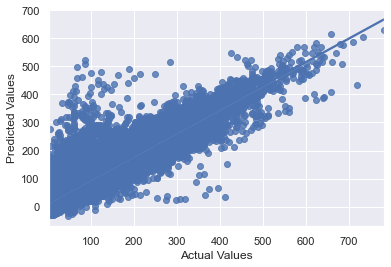

In [55]:
sns.regplot(y_val,val_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [56]:
r2_train = metrics.r2_score(y_train,train_pred)
r2_val = metrics.r2_score(y_val,val_pred)

print("R2 score for training set is {}".format(r2_train))
print("R2 score for validation set is {}".format(r2_val))

R2 score for training set is 0.8335313384012414
R2 score for validation set is 0.8332682301961716


In [57]:
adj_r_squared_train = 1 - (1-r2_train)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
adj_r_squared_val = 1 - (1-r2_val)*(len(y_val)-1)/(len(y_val)-X_val.shape[1]-1)
print("Adjusted R2 score for training set is {}".format(adj_r_squared_train))
print("Adjusted R2 score for val set is {}".format(adj_r_squared_val))

Adjusted R2 score for training set is 0.8335282462285747
Adjusted R2 score for val set is 0.8332558413044352


In [58]:
#print('Mean Absolute Error:', np.expm1(metrics.mean_absolute_error(y_val, val_pred)))
#print('Mean Squared Error:', np.expm1(metrics.mean_squared_error(y_val, val_pred)))
#print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, val_pred)))

In [59]:
#coeffecients = pd.DataFrame(regressor.coef_,features)
#coeffecients.columns = ['Coeffecient']
#coeffecients

__y = 78.75859389511484 + 51.48617059 `*` PM10 + 25.006441 `*` CO __

# Model2

**RMSE Values**
- 32.02628178538602
- 31.84828413332727

_y = 78.75859389511484 + 48.603756 `*` PM10 + 20.910879 `*` CO + 5.416356`*` dioxides - 15.657477`*` TEMP + 5.799920 `*`O3 + 18.836738 `*`DEWP__

**R^2Values**
- R2 score for training set is 0.8335313384012414
- R2 score for validation set is 0.8332682301961716